In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
%matplotlib inline

In [0]:
data=pd.read_csv('heart.csv')

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

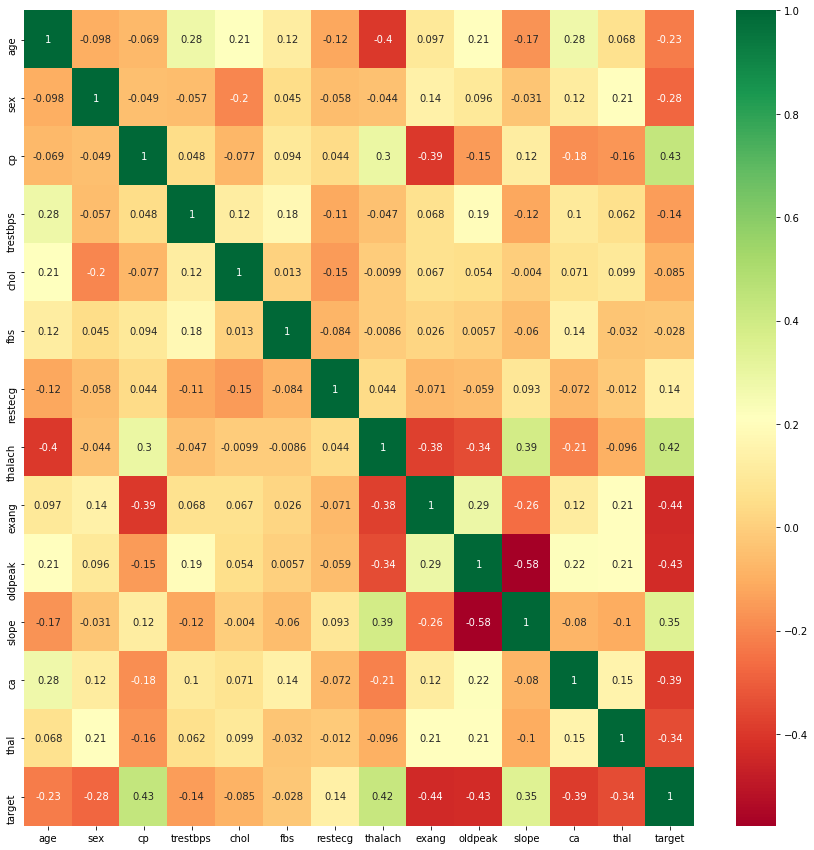

In [9]:
correlation=data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=correlation,annot=True,cmap="RdYlGn")

<Figure size 1440x1440 with 0 Axes>

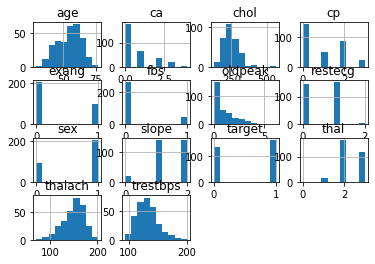

In [10]:
plt.figure(figsize=(20,20))
data.hist()
plt.show()

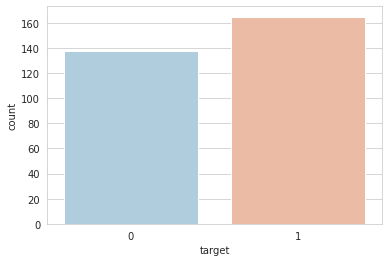

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=data,palette='RdBu_r')

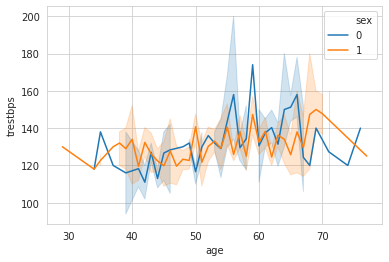

In [12]:
sns.lineplot(x='age',y='trestbps',data=data,hue='sex')

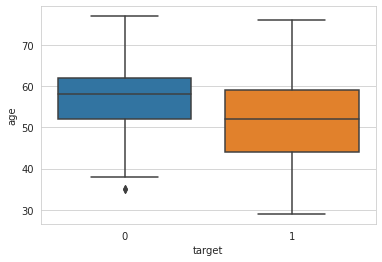

In [13]:
sns.boxplot(x='target',y='age',data=data)

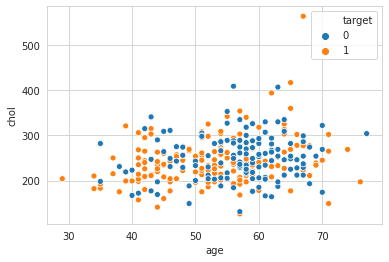

In [14]:
sns.scatterplot(x='age',y='chol',data=data,hue='target')

In [0]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
columns_to_scale=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale]=standard.fit_transform(data[columns_to_scale])

In [0]:
X=data.drop(columns=['target'],axis=1)
y=data['target']

In [17]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.478391,-0.101730,0,1,-1.165281,1,-0.724323,1,0,3
299,-1.033002,1,3,-1.234996,0.342756,0,1,-0.771706,0,0.138373,1,0,3
300,1.503641,1,0,0.706843,-1.029353,1,1,-0.378132,0,2.036303,1,2,3
301,0.290464,1,0,-0.092738,-2.227533,0,1,-1.515125,1,0.138373,1,1,3


In [18]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [19]:
print(model.feature_importances_)

[0.07277661 0.05616276 0.11593927 0.06276879 0.05786191 0.01957094
 0.03702847 0.08525968 0.10489219 0.08283265 0.06996137 0.12557334
 0.10937202]


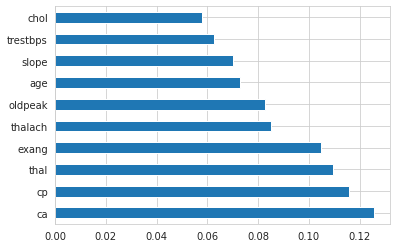

In [20]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [0]:
X=data[['ca','cp','thal','exang','oldpeak','thalach','slope']]
y=data['target']

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import  KNeighborsClassifier

In [0]:
knn_scores=[]
for i in range(1,21):
  knn_classifier=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn_classifier,X,y,cv=10,scoring='accuracy')
  knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

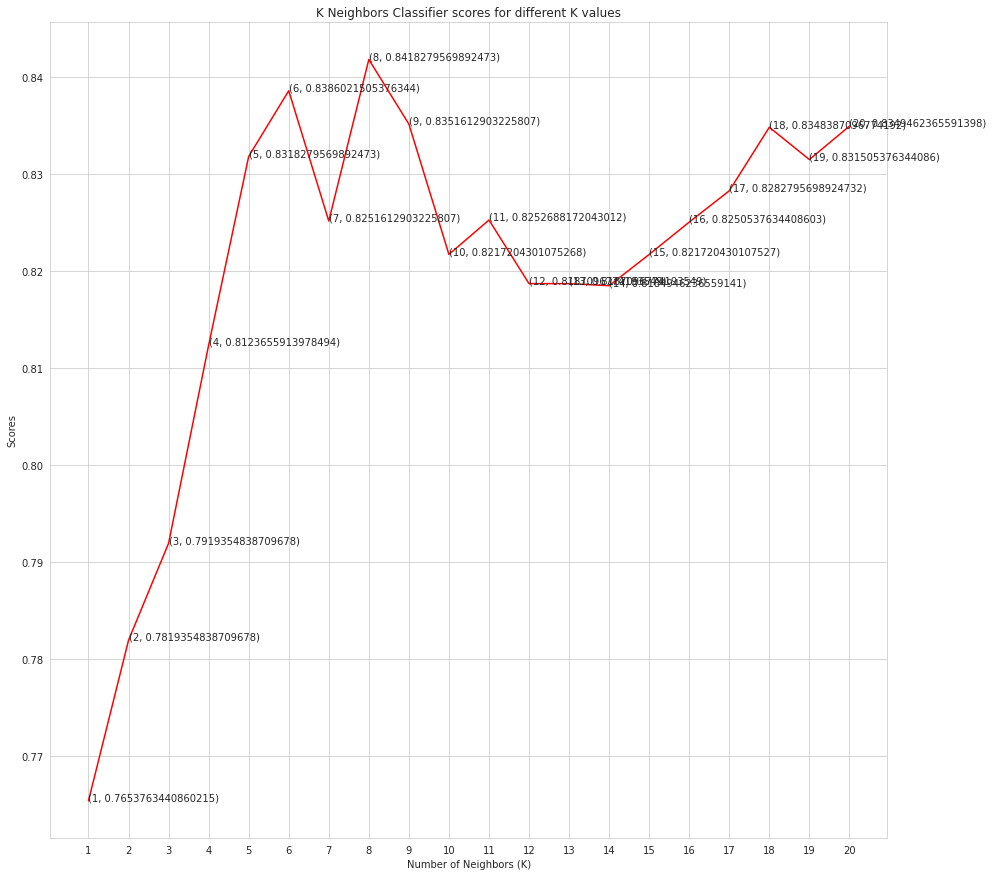

In [24]:
plt.figure(figsize=(15,15))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [25]:
knn_classifier=KNeighborsClassifier(n_neighbors=6,)
score=cross_val_score(knn_classifier,X,y,cv=10,scoring='accuracy')
print(score.mean())

0.8386021505376344


In [0]:

from sklearn.ensemble import RandomForestClassifier

In [0]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,X,y,cv=10,scoring='roc_auc')

In [36]:
score.mean()

0.884597204266322

In [37]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
score=cross_val_score(logistic,X,y,cv=10,scoring='roc_auc')
score.mean()

0.8925965578539108

In [43]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier(estimators=[('lr',logistic),('rf',randomforest_classifier),('knn',knn_classifier)],voting='soft')
score=cross_val_score(voting_clf,X,y,cv=10,scoring='roc_auc')
score.mean()

0.9111304137039431

BEST model here is Voting classifier model works the best amongst the lot
 LETS CHECK ITS ROC AND AUC VALUE